In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

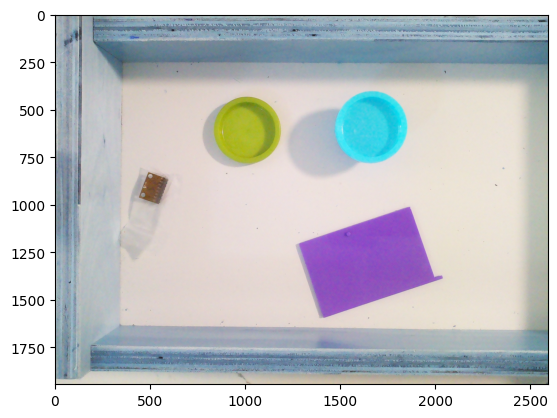

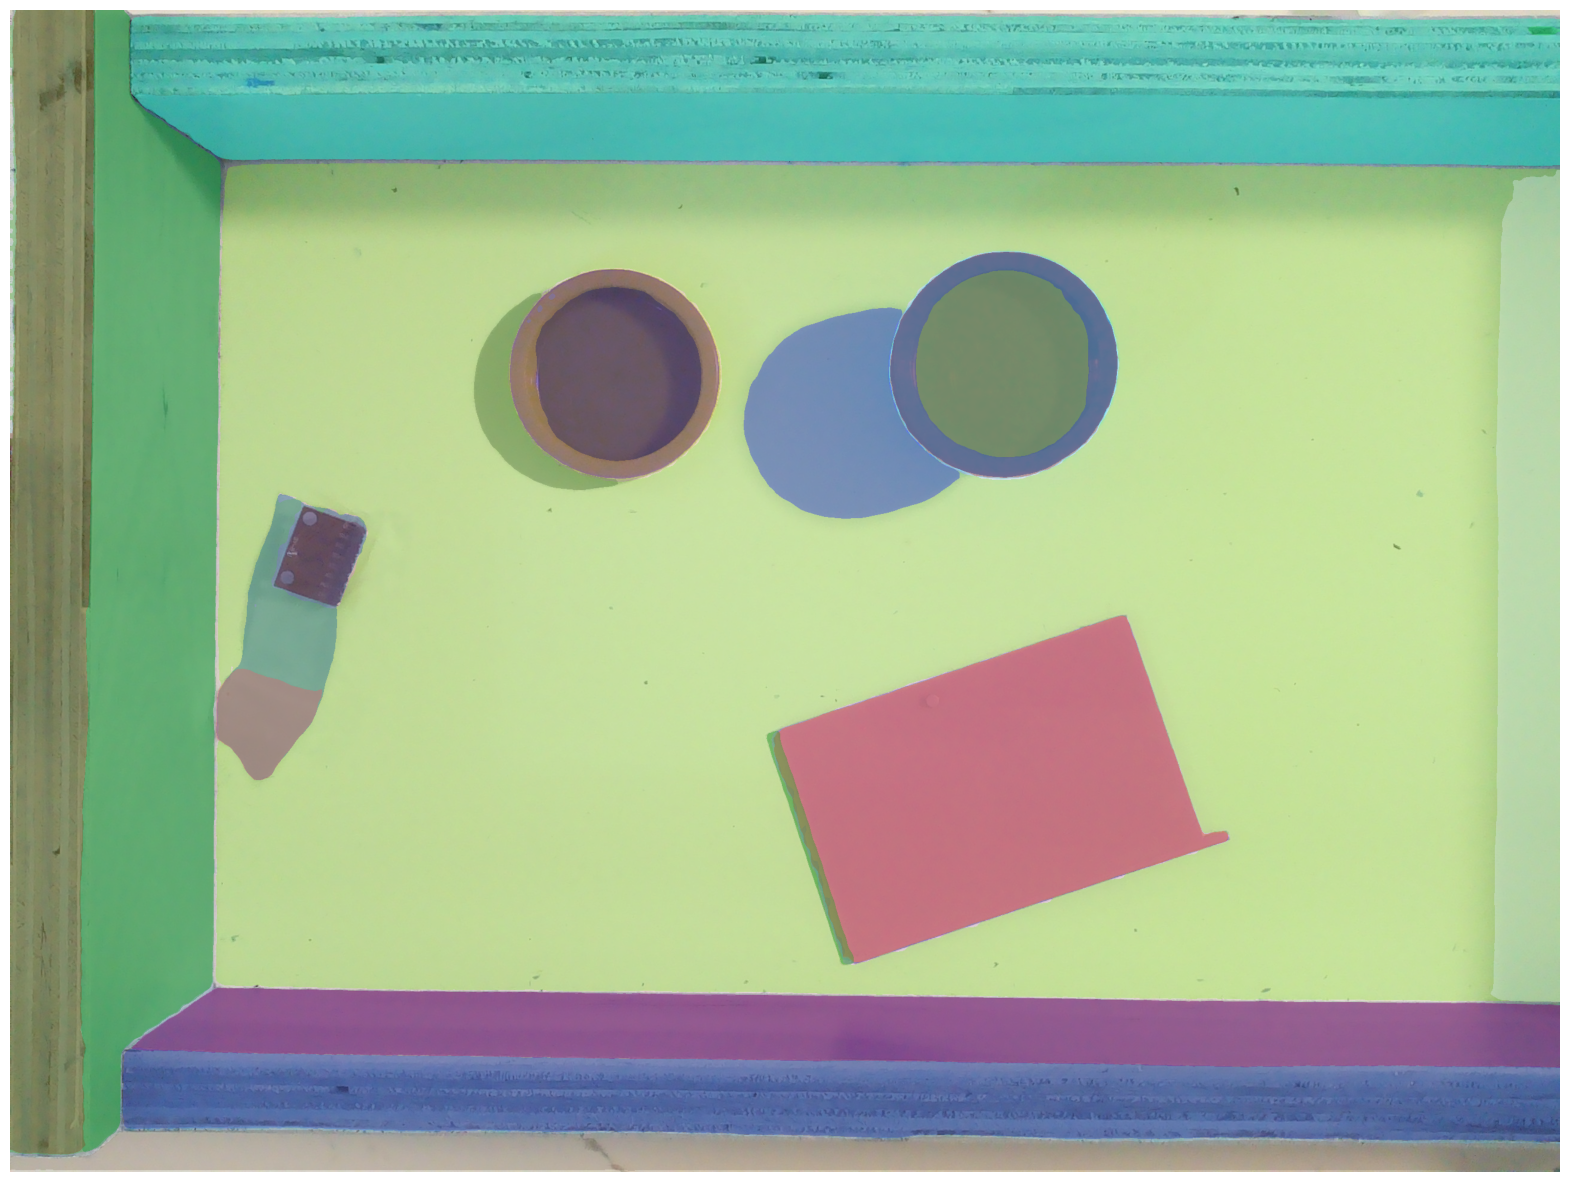

In [2]:
import cv2

from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
from matplotlib import pyplot as plt

image = cv2.imread("test.jpg")
plt.imshow(image)
#resized = cv2.resize(image,(640, 450))
#plt.imshow(resized)

# https://github.com/facebookresearch/segment-anything
# Download model from here https://github.com/facebookresearch/segment-anything#model-checkpoints

#sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
sam = sam_model_registry["vit_l"](checkpoint="sam_vit_l_0b3195.pth")
sam.to(device='cuda')
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 